In [4]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [5]:
diabetes=load_diabetes()
rfe=RandomForestRegressor(n_estimators=23)
xtrain,xtest,ytrain,ytest=train_test_split(diabetes.data,diabetes.target,test_size=0.3)
score=cross_val_score(rfe,diabetes.data,diabetes.target,cv=10).mean()
score

0.3692263471967922

In [6]:
diabetes.data.shape

(442, 10)

In [7]:
xfull,yfull=diabetes.data,diabetes.target
n_samples=xfull.shape[0]
n_features=xfull.shape[1]

In [8]:
rng=np.random.RandomState(1)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
missing_features = rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)
x_missing = xfull.copy()
y_missing = yfull.copy()
x_missing[missing_samples,missing_features] = np.nan
x_missing = pd.DataFrame(x_missing)

In [9]:
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(missing_values=np.nan,strategy="mean")
x_missing_mean=imp_mean.fit_transform(x_missing)

In [10]:
imp_0=SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0)
x_missing_0=imp_0.fit_transform(x_missing)

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV

In [12]:
breast_cancer=load_breast_cancer()
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [14]:
rfc=RandomForestRegressor(n_estimators=100,random_state=1)
score0=cross_val_score(rfc,breast_cancer.data,breast_cancer.target,cv=10).mean()
score0

0.8265000639571586

0.8208884692277062 100


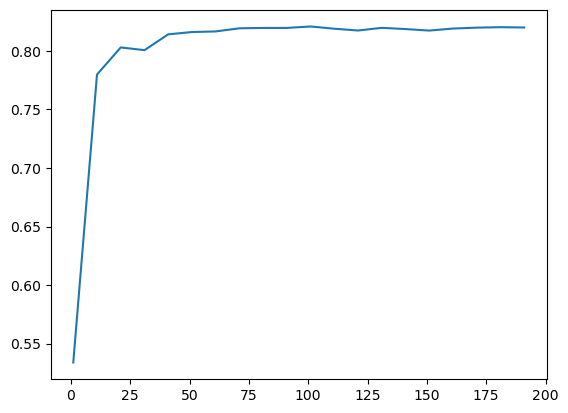

In [17]:
score=[]
for i in range(1,201,10):
    rfc=RandomForestRegressor(n_estimators=i,random_state=1,n_jobs=-1)
    score1=cross_val_score(rfc,breast_cancer.data,breast_cancer.target,cv=5).mean()
    score.append(score1)
print(max(score),score.index(max(score))*10)
plt.figure()
plt.plot(range(1,201,10),score)
plt.show()

0.8210729297044168 100


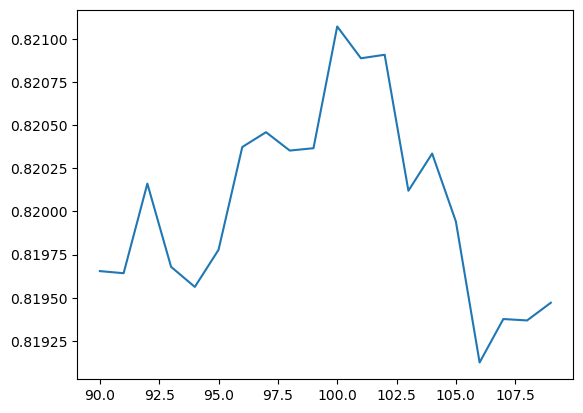

In [16]:
score=[]
for i in range(90,110):
    rfc=RandomForestRegressor(n_estimators=i,random_state=1)
    score1=cross_val_score(rfc,breast_cancer.data,breast_cancer.target,cv=5).mean()
    score.append(score1)
print(max(score),score.index(max(score))*10)
plt.figure()
plt.plot(range(90,110),score)
plt.show()